In [73]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import pickle
import os, sys

# for url models: 

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

# for visualizations: 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# for full models: 
from collections import defaultdict 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
os.chdir(sys.path[0])

# URL Models

### DMOZ

In [14]:
names=['Url','Category']
df_original=pd.read_csv('data/dmoz.csv', names=names, na_filter=False)

df_original_no_duplicates = df_original.drop_duplicates(subset=['Url'], keep='first')
df_original_no_duplicates.index = np.arange(1, len(df_original_no_duplicates) + 1)

idxs_cats_start = (1, 50000, 520000, 535300, 650000, 710000, 764200, 793080, 
                   839730, 850000, 955250, 1013000, 1143000, 1293000, 1492000)

n_per_cat = 2000

idxs_cats_start_new = []

for idx in idxs_cats_start:
    url_cat_start = df_original.iloc[idx]['Url']
    idx_cat_start = df_original_no_duplicates.index[df_original_no_duplicates['Url'] == url_cat_start]
    assert len(idx_cat_start) == 1
    assert url_cat_start == df_original[idx: idx+1]['Url'].values[0]
    idxs_cats_start_new.append(idx_cat_start[0])

# Create new train and test sets:

df_correct = df_original_no_duplicates.copy()
dt_correct = pd.concat([df_correct[idx:idx+n_per_cat] for idx in idxs_cats_start_new], axis=0)

for idx in idxs_cats_start_new:
    df_correct.drop(range(idx+1, idx+n_per_cat+1), inplace=True)
    # +1 since dt_correct used slicing which starts from 0, but df_correct idxs in drop start from 1

dmoz_url_x_train = df_correct['Url']
dmoz_url_y_train = df_correct['Category']
dmoz_url_x_test = dt_correct['Url']
dmoz_url_y_test = dt_correct['Category']

In [18]:
with open('models/url_classifier_dmoz.pickle', 'rb') as f: 
    dmoz_url_model = pickle.load(f)
    
dmoz_url_y_pred = dmoz_url_model.predict(dmoz_url_x_test)
precision_recall_fscore_support(dmoz_url_y_test, dmoz_url_y_pred, average='weighted')

(0.44483971544754464, 0.2298, 0.21259526042396515, None)

In [26]:
print(classification_report(dmoz_url_y_test, dmoz_url_y_pred))

              precision    recall  f1-score   support

       Adult       0.91      0.16      0.27      2000
        Arts       0.21      0.53      0.30      2000
    Business       0.13      0.90      0.23      2000
   Computers       0.26      0.11      0.15      2000
       Games       0.34      0.11      0.17      2000
      Health       0.71      0.13      0.22      2000
        Home       0.48      0.09      0.16      2000
        Kids       0.56      0.12      0.20      2000
        News       0.93      0.01      0.03      2000
  Recreation       0.35      0.22      0.27      2000
   Reference       0.31      0.15      0.20      2000
     Science       0.52      0.56      0.54      2000
    Shopping       0.23      0.04      0.06      2000
     Society       0.08      0.12      0.09      2000
      Sports       0.64      0.19      0.30      2000

    accuracy                           0.23     30000
   macro avg       0.44      0.23      0.21     30000
weighted avg       0.44   

<AxesSubplot:>

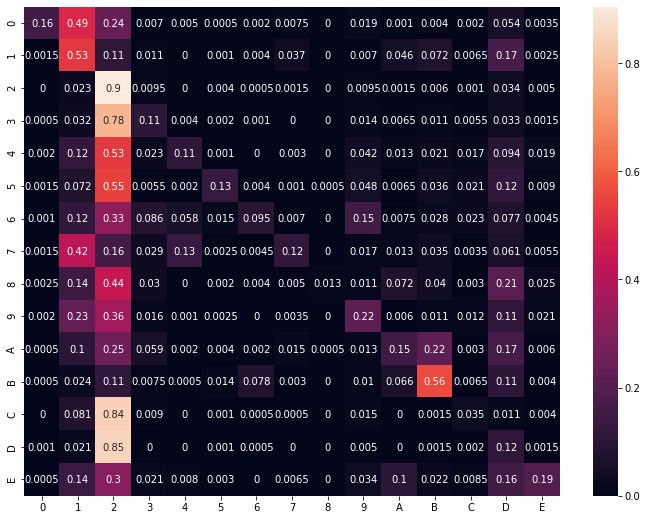

In [22]:
array = confusion_matrix(dmoz_url_y_test, dmoz_url_y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True)

## Shalla List

In [24]:
shalla_df = pd.read_csv('data/shalla.csv', names=names, na_filter=False)

shalla_category_counts = shalla_df.groupby('Category').count()

train_fraction = 0.9

train_count = 0

temp_train = []
temp_test = []

train_test_labels = np.array([])

for category_count in shalla_category_counts.Url: 
    train_count = round(train_fraction * category_count)

    temp_train = np.zeros(train_count)
    temp_test = np.zeros(category_count - train_count) + 1 

    train_test_labels = np.append(train_test_labels, temp_train)
    train_test_labels = np.append(train_test_labels, temp_test)

shalla_df['train_test'] = train_test_labels.astype(int)
shalla_train = shalla_df.loc[shalla_df.train_test == 0, ['Url', 'Category']].reset_index(drop=True)
shalla_test = shalla_df.loc[shalla_df.train_test == 1, ['Url', 'Category']].reset_index(drop=True)


shalla_url_x_train = shalla_train['Url']
shalla_url_y_train = shalla_train['Category']
shalla_url_x_test = shalla_test['Url']
shalla_url_y_test = shalla_test['Category']

In [25]:
with open('models/url_classifier_shalla.pickle', 'rb') as f: 
    shalla_url_model = pickle.load(f)
    
shalla_url_y_pred = shalla_url_model.predict(shalla_url_x_test)
precision_recall_fscore_support(shalla_url_y_test, shalla_url_y_pred, average='weighted')

(0.5577600701416714, 0.5921027809399902, 0.5236405800969152, None)

In [27]:
print(classification_report(shalla_url_y_test, shalla_url_y_pred))

                         precision    recall  f1-score   support

            advertising       0.29      0.07      0.12      1431
             aggressive       0.07      0.01      0.02       113
   career_and_insurance       0.91      0.35      0.51       746
              education       0.80      0.63      0.70      1006
                finance       0.39      0.06      0.10       923
                   food       0.61      0.07      0.12       211
                  games       0.46      0.10      0.16      1607
             government       0.60      0.07      0.12        91
                hacking       0.32      0.15      0.21      6107
                 health       0.59      0.07      0.12       231
                   home       0.50      0.05      0.10       111
media_and_entertainment       0.44      0.15      0.22      7439
                  other       0.23      0.05      0.08        65
                   pets       0.51      0.05      0.09      1878
               politics 

<AxesSubplot:>

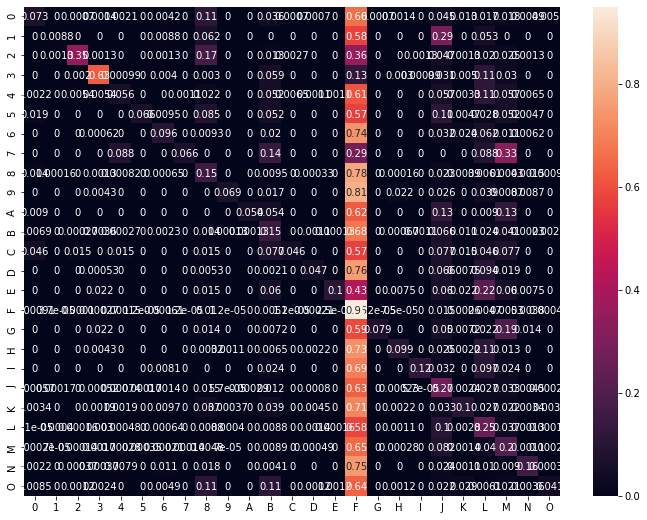

In [30]:
array = confusion_matrix(shalla_url_y_test, shalla_url_y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDEFGHIJKLMNO"],
                  columns = [i for i in "0123456789ABCDEFGHIJKLMNO"])
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True)

# Full Models

## First, need to generate a vocabulary for each data set. 

In [31]:
import sqlite3

In [35]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [32]:
conn = sqlite3.connect('databases/url_data.db')
cursor = conn.cursor()

## DMOZ Vocabulary

In [33]:
dmoz_all_text = []

query = "SELECT * FROM dmoz"
cursor.execute(query)

for row in cursor.fetchall(): 
    dmoz_all_text.append(row[2])

In [37]:
dmoz_cv = CountVectorizer(lowercase=False)
dmoz_counts = dmoz_cv.fit_transform(dmoz_all_text)
dmoz_transformer = TfidfTransformer().fit(dmoz_counts)
dmoz_tf = dmoz_transformer.transform(dmoz_counts)

In [39]:
#sort the tf-idf vectors by descending order of scores
dmoz_sorted_items=sort_coo(dmoz_tf.tocoo())

#extract only the top n; n here is 10
dmoz_keywords_clean=extract_topn_from_vector(dmoz_cv.get_feature_names(), dmoz_sorted_items, 500)


print("\n===Keywords===")
for k in dmoz_keywords_clean:
    print(k, dmoz_keywords_clean[k])


===Keywords===
¼ã 1.0
welcome 1.0
top 1.0
submit 1.0
redirecting 1.0
redirect 1.0
nov 1.0
mail 1.0
loading 1.0
launching 1.0
hello 1.0
h3c 1.0
forbidden 1.0
fall 1.0
enter 1.0
english 0.925
endif 1.0
education 1.0
amazon 1.0
page 0.999
amp 0.998
symfony 0.994
asdf 0.987
df 0.984
lyrics 0.957
involved参与支持get 0.979
utc 0.979
sakamoto 0.979
àµ 0.978
ver 0.976
herdsa 0.975
aleve 0.975
pitas 0.975
season 0.975
euroclear 0.975
costumes 0.974
spezial 0.974
icse 0.974
pumpkin 0.974
uwc 0.973
nzx 0.972
ioi 0.971
robocup 0.971
staroffice 0.971
vta 0.97
koppers 0.97
rescue 0.97
dogme 0.97
ccbc 0.97
brownie 0.97
volt 0.969
histology 0.969
trainz 0.969
leica 0.969
piano 0.968
best 0.968
zimbra 0.968
entrix 0.968
bamboo 0.923
flax 0.967
fortran 0.967
wallpaper 0.966
hotels 0.964
daml 0.966
photos 0.965
schools 0.965
sake 0.964
seeds 0.964
django 0.964
mingus 0.964
candy 0.961
stata 0.963
trivia 0.962
vol 0.962
vermeer 0.962
chess 0.917
tulane 0.961
ielts 0.961
fvwm 0.961
mandee 0.961
nra 0.961
poke

In [76]:
i = 0 
dmoz_vocabulary = defaultdict(int)
for item in dmoz_keywords_clean.keys(): 
    dmoz_vocabulary[item] = i 
    i+=1 

In [77]:
file_to_dump = open('models/dmoz_data/dmoz_vocabulary.pickle', "wb")
pickle.dump(dmoz_vocabulary, file_to_dump)
file_to_dump.close()

## Shalla List Vocabulary

In [43]:
shalla_all_text = []

query = "SELECT * FROM shalla"
cursor.execute(query)

for row in cursor.fetchall(): 
    shalla_all_text.append(row[2])

In [44]:
shalla_cv = CountVectorizer(lowercase=False)
shalla_counts = shalla_cv.fit_transform(shalla_all_text)
shalla_transformer = TfidfTransformer().fit(shalla_counts)
shalla_tf = shalla_transformer.transform(shalla_counts)

In [45]:
#sort the tf-idf vectors by descending order of scores
shalla_sorted_items=sort_coo(shalla_tf.tocoo())

#extract only the top n; n here is 10
shalla_keywords_clean=extract_topn_from_vector(shalla_cv.get_feature_names(), shalla_sorted_items, 500)


print("\n===Keywords===")
for k in shalla_keywords_clean:
    print(k, shalla_keywords_clean[k])


===Keywords===
直播充值 1.0
所有游戏 1.0
メンテナンス中です 1.0
загрузка 1.0
íurl 1.0
ìtop 1.0
ìhp 1.0
ç½ 1.0
top 1.0
test 1.0
submit 1.0
search 1.0
redirecting 1.0
privacy 1.0
ok 1.0
milkandcookies 1.0
loading 1.0
load 1.0
homepage 1.0
home 1.0
hello 1.0
forbidden 1.0
fip 1.0
fall 1.0
excess 1.0
error 1.0
enter 1.0
edns 1.0
continue 1.0
babes 1.0
amazon 1.0
altern 1.0
all 1.0
ace 1.0
page 0.997
ladyboy 0.997
county 0.95
escort 0.996
tube 0.996
bbw 0.996
tubes 0.923
minutes 0.995
milf 0.981
ªá 0.994
disponible 0.994
mature 0.965
total 0.989
webcam 0.991
pictures 0.904
gmt 0.925
video 0.988
embassy 0.986
nude 0.967
cyberspace 0.984
videos 0.91
icon 0.973
ouvir 0.982
borrow 0.982
e4ea 0.981
powiat 0.98
epom 0.979
àµ 0.978
parador 0.978
mom 0.977
vine 0.976
xxx 0.976
厘米 0.975
pantyhose 0.91
jahre 0.941
lyrics 0.915
amp 0.974
rescue 0.973
fm 0.946
fernie 0.972
trainz 0.972
gallery 0.96
check 0.971
pl 0.971
photos 0.97
nzx 0.969
shemale 0.962
games 0.917
vta 0.969
超清 0.968
homestays 0.968
wpt 0.968
eur 0.9

In [74]:
i = 0 
shalla_vocabulary = defaultdict(int)
for item in shalla_keywords_clean.keys(): 
    shalla_vocabulary[item] = i 
    i+=1 

In [75]:
file_to_dump = open('models/shalla_data/shalla_vocabulary.pickle', "wb")
pickle.dump(shalla_vocabulary, file_to_dump)
file_to_dump.close()

I don't actually use these vocabularies here to train the model, just included for demonstration purposes. Look at build_model_full.py for full demonstration of how these vocabularies are used in the creation of the input for training!

# Testing the Full Models

## DMOZ Full Model

In [48]:
with open('models/dmoz_data/dmoz_full_x.npy', 'rb') as f: 
    dmoz_full_input = np.load(f)
with open('models/dmoz_data/dmoz_full_y.npy', 'rb') as f: 
    dmoz_y_train = np.load(f, allow_pickle=True)

dmoz_full_train_data, dmoz_full_test_data, dmoz_full_train_labels, dmoz_full_test_labels = train_test_split(dmoz_full_input, dmoz_y_train, test_size=0.20, random_state=42)

### Base Full Model (Default Parameters)

In [52]:
dmoz_rf_default = RandomForestClassifier()
dmoz_rf_default.fit(dmoz_full_train_data, dmoz_full_train_labels)

RandomForestClassifier()

In [53]:
dmoz_full_pred = dmoz_rf_default.predict(dmoz_full_test_data)
print(classification_report(dmoz_full_test_labels, dmoz_full_pred))

              precision    recall  f1-score   support

       Adult       0.33      0.04      0.07        50
        Arts       0.35      0.34      0.35       951
    Business       0.32      0.72      0.44      1727
   Computers       0.41      0.39      0.40       963
       Games       0.50      0.04      0.08       182
      Health       0.30      0.07      0.11       361
        Home       0.30      0.02      0.04       141
        Kids       0.31      0.08      0.12       195
        News       0.73      0.54      0.62       343
  Recreation       0.29      0.06      0.10       486
   Reference       0.50      0.53      0.51       789
     Science       0.14      0.02      0.04       518
    Shopping       0.41      0.17      0.24       494
     Society       0.27      0.25      0.26      1038
      Sports       0.41      0.23      0.30       273

    accuracy                           0.36      8511
   macro avg       0.37      0.23      0.25      8511
weighted avg       0.36   

### Here, the optimal parameters were selected from running hyperparameter_tuning.py
Essentially, a randomized search cross-validation was run over a set of ranges per parameter argument, and the best was selected. 

In [54]:
dmoz_rf_best = RandomForestClassifier(n_estimators=140,
min_samples_split=5,
min_samples_leaf=1,
max_features='sqrt',
max_depth=80,
bootstrap=False)

In [55]:
dmoz_rf_best.fit(dmoz_full_train_data, dmoz_full_train_labels)

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='sqrt',
                       min_samples_split=5, n_estimators=140)

In [59]:
dmoz_full_pred_best_train = dmoz_rf_best.predict(dmoz_full_train_data)
print(classification_report(dmoz_full_train_labels, dmoz_full_pred_best_train))

              precision    recall  f1-score   support

       Adult       0.98      0.98      0.98       276
        Arts       0.92      0.94      0.93      3931
    Business       0.88      0.97      0.92      6984
   Computers       0.98      0.93      0.96      3717
       Games       0.99      0.93      0.96       666
      Health       0.99      0.91      0.95      1583
        Home       0.99      0.87      0.93       499
        Kids       1.00      0.92      0.96       839
        News       0.99      0.93      0.96      1247
  Recreation       0.97      0.91      0.94      1920
   Reference       0.99      0.93      0.96      2966
     Science       0.97      0.92      0.94      2001
    Shopping       0.99      0.96      0.97      1991
     Society       0.86      0.93      0.89      4259
      Sports       1.00      0.94      0.97      1163

    accuracy                           0.94     34042
   macro avg       0.97      0.93      0.95     34042
weighted avg       0.94   

In [56]:
dmoz_full_pred_best = dmoz_rf_best.predict(dmoz_full_test_data)
print(classification_report(dmoz_full_test_labels, dmoz_full_pred_best))

              precision    recall  f1-score   support

       Adult       0.25      0.04      0.07        50
        Arts       0.36      0.35      0.35       951
    Business       0.33      0.72      0.45      1727
   Computers       0.40      0.39      0.40       963
       Games       0.54      0.07      0.13       182
      Health       0.35      0.09      0.14       361
        Home       0.33      0.01      0.03       141
        Kids       0.35      0.09      0.14       195
        News       0.75      0.54      0.63       343
  Recreation       0.34      0.08      0.13       486
   Reference       0.50      0.54      0.52       789
     Science       0.19      0.03      0.05       518
    Shopping       0.47      0.19      0.27       494
     Society       0.27      0.26      0.26      1038
      Sports       0.45      0.24      0.31       273

    accuracy                           0.36      8511
   macro avg       0.39      0.24      0.26      8511
weighted avg       0.37   

<AxesSubplot:>

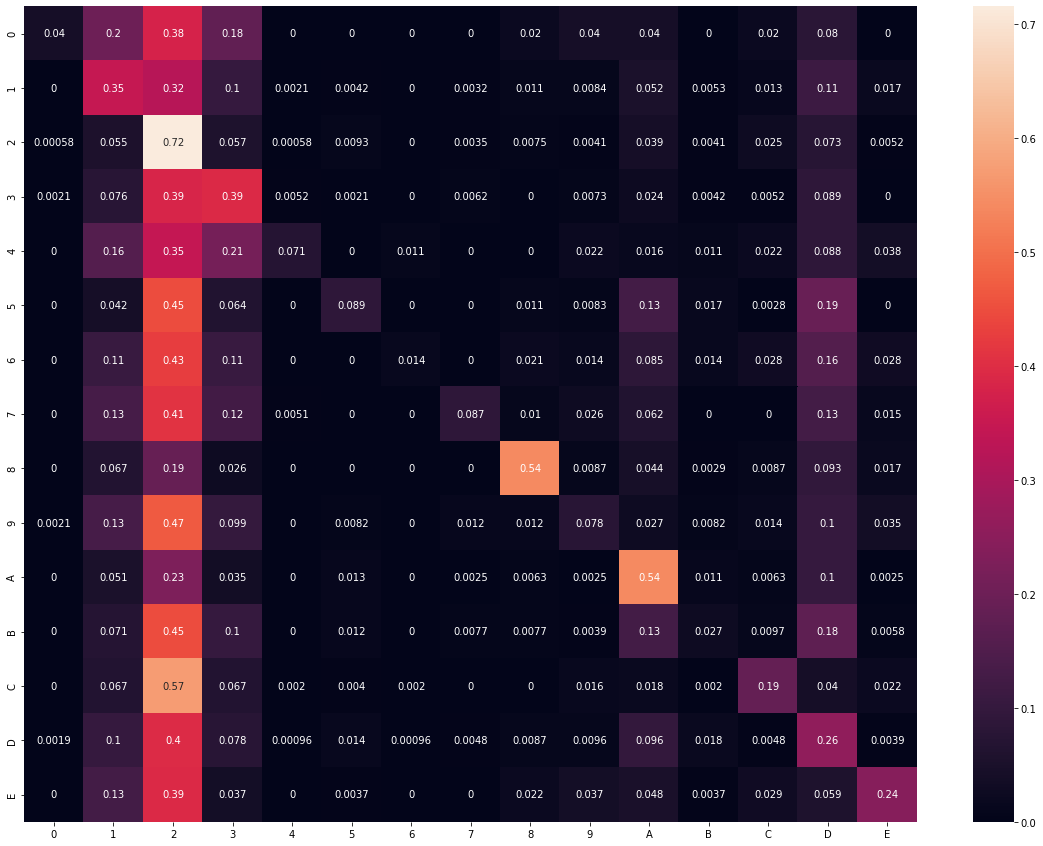

In [61]:
array = confusion_matrix(dmoz_full_test_labels, dmoz_full_pred_best)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

## Shalla List Full Model 

In [57]:
with open('models/shalla_data/shalla_full_x.npy', 'rb') as f: 
    shalla_full_input = np.load(f)
with open('models/shalla_data/shalla_full_y.npy', 'rb') as f: 
    shalla_y_train = np.load(f, allow_pickle=True)

shalla_full_train_data, shalla_full_test_data, shalla_full_train_labels, shalla_full_test_labels = train_test_split(shalla_full_input, shalla_y_train, test_size=0.20, random_state=42)

In [58]:
shalla_rf_default = RandomForestClassifier()
shalla_rf_default.fit(shalla_full_train_data, shalla_full_train_labels)

RandomForestClassifier()

In [60]:
shalla_full_pred = shalla_rf_default.predict(shalla_full_test_data)
print(classification_report(shalla_full_test_labels, shalla_full_pred))

                         precision    recall  f1-score   support

            advertising       0.56      0.09      0.15       104
             aggressive       0.25      0.04      0.07        24
   career_and_insurance       0.74      0.35      0.47        84
              education       0.57      0.53      0.55       614
                finance       0.82      0.26      0.40       195
                   food       0.40      0.04      0.08        45
                  games       0.61      0.51      0.56       256
             government       0.83      0.06      0.11        81
                hacking       0.65      0.23      0.34       135
                 health       0.50      0.03      0.06        33
                   home       0.00      0.00      0.00        32
media_and_entertainment       0.44      0.82      0.57      2343
                  other       1.00      0.05      0.10        38
                   pets       0.40      0.04      0.07        50
               politics 

### With Optimal Parameters: 

In [62]:
shalla_rf_best = RandomForestClassifier(n_estimators=160,
min_samples_split=5,
min_samples_leaf=1,
max_features='sqrt',
max_depth=70,
bootstrap=False)

In [63]:
shalla_rf_best.fit(shalla_full_train_data, shalla_full_train_labels)

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_split=5, n_estimators=160)

In [64]:
shalla_full_pred_best_train = shalla_rf_best.predict(shalla_full_train_data)
print(classification_report(shalla_full_train_labels, shalla_full_pred_best_train))

                         precision    recall  f1-score   support

            advertising       0.96      0.90      0.93       429
             aggressive       1.00      0.94      0.97        86
   career_and_insurance       0.98      0.96      0.97       445
              education       0.97      0.97      0.97      2409
                finance       0.99      0.98      0.99       775
                   food       1.00      0.87      0.93       231
                  games       0.98      0.96      0.97      1078
             government       1.00      0.96      0.98       231
                hacking       0.99      0.93      0.96       548
                 health       1.00      0.96      0.98       143
                   home       1.00      0.95      0.98       132
media_and_entertainment       0.93      0.99      0.96      9206
                  other       1.00      0.97      0.98       101
                   pets       0.99      0.92      0.95       236
               politics 

In [65]:
shalla_full_pred_best = shalla_rf_best.predict(shalla_full_test_data)
print(classification_report(shalla_full_test_labels, shalla_full_pred_best))

                         precision    recall  f1-score   support

            advertising       0.41      0.09      0.14       104
             aggressive       0.50      0.04      0.08        24
   career_and_insurance       0.79      0.37      0.50        84
              education       0.59      0.58      0.58       614
                finance       0.81      0.28      0.41       195
                   food       0.67      0.04      0.08        45
                  games       0.59      0.52      0.55       256
             government       1.00      0.06      0.12        81
                hacking       0.68      0.22      0.34       135
                 health       1.00      0.03      0.06        33
                   home       0.00      0.00      0.00        32
media_and_entertainment       0.45      0.83      0.58      2343
                  other       1.00      0.05      0.10        38
                   pets       0.22      0.04      0.07        50
               politics 

c:\users\danny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\danny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\danny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<AxesSubplot:>

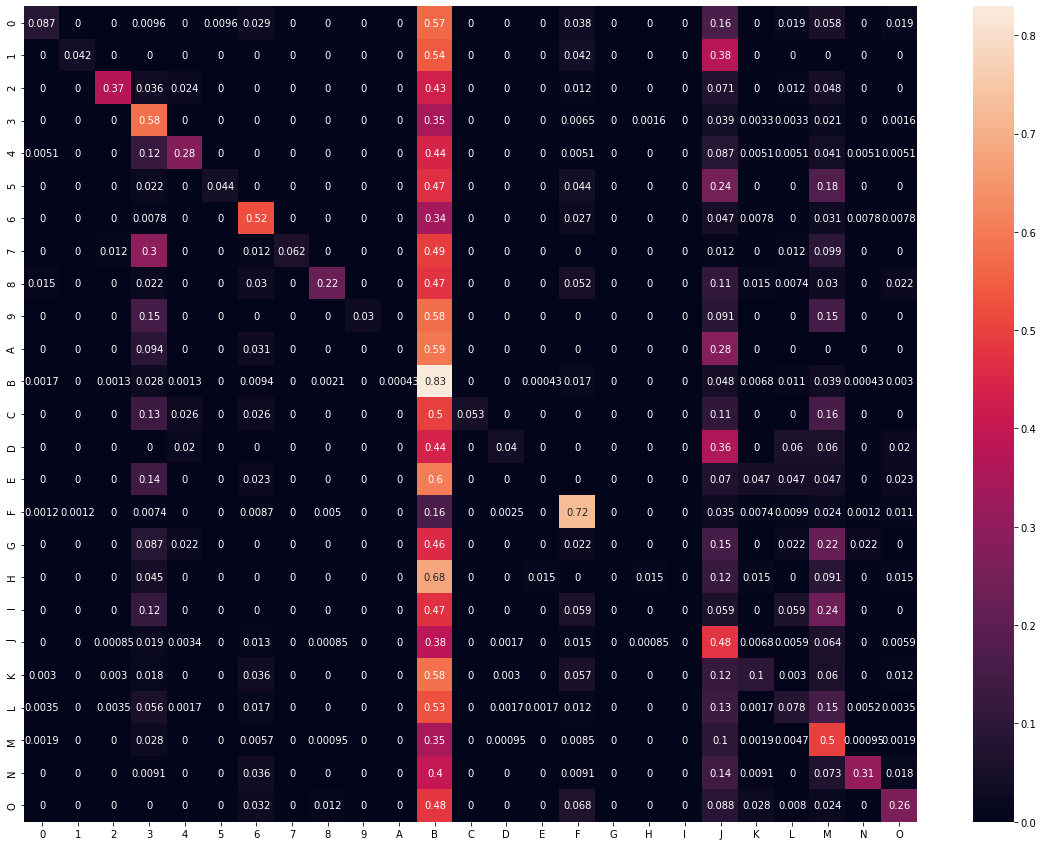

In [66]:
array = confusion_matrix(shalla_full_test_labels, shalla_full_pred_best)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDEFGHIJKLMNO"],
                  columns = [i for i in "0123456789ABCDEFGHIJKLMNO"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)